In [2]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [3]:
alpha = np.array([316.8204742,317.3160061])
delta = np.array([-66.06258802, -66.60077362])

In [4]:
import pandas as pd
data = {'ALPHA_J2000': alpha,
        'DELTA_J2000': delta,}

In [5]:
galaxy = pd.DataFrame(data,columns=['ALPHA_J2000','DELTA_J2000'])
galaxy

,ALPHA_J2000,DELTA_J2000
0,316.820474,-66.062588
1,317.316006,-66.600774


In [6]:
galaxy.to_csv('galaxies_redshift.csv', sep = ',')

In [7]:
tables = Table.read('crossmatch')
tables

NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_ISO,MAGERR_ISO,FLUX_APER [13],FLUXERR_APER [13],MAGERR_APER [13],MAG_APER [13],FLUX_AUTO,FLUXERR_AUTO,MAG_AUTO,MAGERR_AUTO,BACKGROUND,ALPHAPEAK_J2000,DELTAPEAK_J2000,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,FLAGS,ELONGATION,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS,SNR_WIN,MAG_APER_g [13],FLUX_APER_g [13],FLUXERR_APER_g [13],MAGERR_APER_g [13],MAGERR_AUTO_g,BACKGROUND_g,MAG_AUTO_g,MAG_APER_r [13],FLUX_APER_r [13],FLUXERR_APER_r [13],MAGERR_APER_r [13],MAGERR_AUTO_r,BACKGROUND_r,MAG_AUTO_r,MAG_APER_i [13],FLUX_APER_i [13],FLUXERR_APER_i [13],MAGERR_APER_i [13],MAGERR_AUTO_i,BACKGROUND_i,MAG_AUTO_i,MAG_APER_z [13],FLUX_APER_z [13],FLUXERR_APER_z [13],MAGERR_APER_z [13],MAGERR_AUTO_z,BACKGROUND_z,MAG_AUTO_z,MAG_APER_y [13],FLUX_APER_y [13],FLUXERR_APER_y [13],MAGERR_APER_y [13],MAGERR_AUTO_y,BACKGROUND_y,MAG_AUTO_y,col1,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation_2,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations,Separation
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,bytes25,float64,float64,bytes6,int32,float64,bytes4,bytes5,float32,int16,int16,int16,int16,int16,int16,int16,float64
22665,41854.723,10.7883005,15.445639,0.00027992288,1733.9917 .. 19778.248,0.74197584 .. 3.2015975,0.0004646999 .. 0.00017579591,18.902382 .. 16.259531,41104.043,9.069194,15.465289,0.00023961498,-0.06980194,317.5807887517044,-66.88932912681594,13026.415,4333.4097,317.5807105076997,-66.88937368398729,2,3.8441787,0.7398664,0.028627027,10.565756,6919.5195,21.696608 .. 18.389427,132.23814 .. 2781.1785,0.2154068 .. 1.1418753,0.0017690189 .. 0.00044588168,0.0004985856,-0.003181161,17.367544,20.489958 .. 17.37108,401.8066 .. 7105.058,0.25855336 .. 1.2669901,0.00069881615 .. 0.00019365798,0.00022247901,-0.008123744,16.447554,19.752724 .. 16.816074,792.3385 .. 11845.957,0.18736625 .. 0.9118299,0.00025680911 .. 8.3593695e-05,0.00011219463,-0.019522043,15.952203,19.319897 .. 16.438028,1180.432 .. 16779.88,0.23419161 .. 1.2167017,0.00021545679 .. 7.8745376e-05,0.00011686865,-0.047298525,15.606116,19.031002 .. 16.247454,1540.2776 .. 19999.469,0.60527045 .. 3.2847357,0.00042675668 .. 0.00017836588,0.00028327262,-0.13204223,15.429063,89,90,WISEA J211019.38-665321.6,317.58083,-66.88928,G,24655,0.08223899999999999,PHOT,16.1r,0.0,2,0,32,6,1,2,0,0.3771670112379454
52847,35164.773,12.735505,15.63473,0.0003933129,1278.6982 .. 17831.836,0.78109616 .. 3.7305307,0.0006633859 .. 0.00022719793,19.23308 .. 16.37201,34307.16,11.839432,15.661538,0.00037477957,-0.04725983,316.87417297920837,-66.73439085644354,16730.424,6411.1865,316.8739018437542,-66.73452659850784,0,1.4803756,0.3244958,0.028627327,9.537748,5476.127,21.24628 .. 18.089622,200.21098 .. 3665.65,0.29705977 .. 1.4693348,0.0016113346 .. 0.00043531097,0.000524515,-0.0038317854,17.123007,20.273006 .. 17.243097,490.67877 .. 7993.937,0.31001616 .. 1.480741,0.00068614655 .. 0.00020116304,0.00026751173,-0.0072105066,16.404371,19.783394 .. 16.801258,770.2689 .. 12008.73,0.19468015 .. 0.97561425,0.000274479 .. 8.8228895e-05,0.00014051069,-0.021365318,16.020678,19.514606 .. 16.522034,986.637 .. 15530.539,0.2574108 .. 1.3975594,0.00028333432 .. 9.772678e-05,0.00017084536,-0.03385621,15.760748,19.2947 .. 16.356173,1208.1467 .. 18093.84,0.6761603 .. 3.8171093,0.00060779875 .. 0.00022910454,0.000425841,-0.0607929,15.603372,75,76,WISEA J210729.81-664403.8,316.87429,-66.73442,G,26191,0.087365,PHOT,

In [8]:
table = Table.read('May_NSF_cat.fits')
table

NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_ISO,MAGERR_ISO,FLUX_APER [13],FLUXERR_APER [13],MAGERR_APER [13],MAG_APER [13],FLUX_AUTO,FLUXERR_AUTO,MAG_AUTO,MAGERR_AUTO,BACKGROUND,ALPHAPEAK_J2000,DELTAPEAK_J2000,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,FLAGS,ELONGATION,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS,SNR_WIN,MAG_APER_g [13],FLUX_APER_g [13],FLUXERR_APER_g [13],MAGERR_APER_g [13],MAGERR_AUTO_g,BACKGROUND_g,MAG_AUTO_g,MAG_APER_r [13],FLUX_APER_r [13],FLUXERR_APER_r [13],MAGERR_APER_r [13],MAGERR_AUTO_r,BACKGROUND_r,MAG_AUTO_r,MAG_APER_i [13],FLUX_APER_i [13],FLUXERR_APER_i [13],MAGERR_APER_i [13],MAGERR_AUTO_i,BACKGROUND_i,MAG_AUTO_i,MAG_APER_z [13],FLUX_APER_z [13],FLUXERR_APER_z [13],MAGERR_APER_z [13],MAGERR_AUTO_z,BACKGROUND_z,MAG_AUTO_z,MAG_APER_y [13],FLUX_APER_y [13],FLUXERR_APER_y [13],MAGERR_APER_y [13],MAGERR_AUTO_y,BACKGROUND_y,MAG_AUTO_y
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
33,25371.93,41.176613,15.989117,0.0017624912,12147.249 .. 64525.285,0.07789323 .. 27.471897,6.9638845e-06 .. 0.00046236886,16.788805 .. 14.975676,67369.46,40.653408,14.928843,0.00065533555,0.08886601,316.4943475467248,-67.12021249322032,18687.314,1257.5382,316.49428767323406,-67.12017194466898,3,1.2685443,0.21169484,0.96235716,3.5241532,22634.533,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.010957605,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.018736891,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.021660982,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.021635406,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.024936497,99.0
135,2518.994,16.678461,18.496933,0.0071904934,5574.0293 .. 50005.195,0.03935403 .. 12.417513,7.66743e-06 .. 0.00026968034,17.634577 .. 15.252462,56612.305,48.039543,15.1177225,0.00092154776,0.6956214,315.96744121982,-67.11501285183257,21420.979,1290.3885,315.967247346567,-67.11513240941288,3,5.9096284,0.8307846,0.9972378,6.874988,8490.516,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.0073003513,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.032285124,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.0056184693,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.020777551,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.073155195,99.0
145,34997.438,49.97494,15.63991,0.0015507645,3590.5474 .. 72399.33,4.601743 .. 27.099678,0.0013918472 .. 0.00040649896,18.112099 .. 14.850664,93526.836,58.038876,14.5726595,0.00067392655,0.58290493,316.35542442777046,-67.11512852086712,19409.346,1316.0988,316.3551611985109,-67.11526998210195,3,1.2301828,0.18711263,0.9623149,4.7684255,21143.678,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.011759858,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.014065191,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.0033426727,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.016973913,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,0.021552963,99.0
230,16519.78,20.817684,16.454988,0.0013685416,14068.273 .. 74212.18,0.020095147 .. 21.41263,1.5512444e-06 .. 0.00031334636,16.629398 .. 14.8238125,74610.734,23.756893,14.817997,0.00034579457,0.31271324,316.49396980801464,-67.11983639772987,18689.078,1262.0,316.4939548760023,-67.11983634931278,3,2.4079695,0.5847124,0.99982464,3.7414985,13070.152,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.010957605,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.018736891,99.0,99.0 .. 99.0,0.0 .. 0.0,0.0 .. 0.0,99.0 .. 99.0,99.0,-0.021660982,99.0,99.0 .. 99.0

# Filter
n =2

In [9]:
%%time
n = 2

flux_g = np.array([table['FLUX_APER_g'][i][n] for i in range(len(table))])
fluxerr_g = np.array([table['FLUXERR_APER_g'][i][n] for i in range(len(table))])

flux_r = np.array([table['FLUX_APER_r'][i][n] for i in range(len(table))])
fluxerr_r = np.array([table['FLUXERR_APER_r'][i][n] for i in range(len(table))])

flux_i = np.array([table['FLUX_APER_i'][i][n] for i in range(len(table))])
fluxerr_i = np.array([table['FLUXERR_APER_i'][i][n] for i in range(len(table))])

flux_z = np.array([table['FLUX_APER_z'][i][n] for i in range(len(table))])
fluxerr_z = np.array([table['FLUXERR_APER_z'][i][n] for i in range(len(table))])

flux_y = np.array([table['FLUX_APER_y'][i][n] for i in range(len(table))])
fluxerr_y = np.array([table['FLUXERR_APER_y'][i][n] for i in range(len(table))])

# def choose_aper(n):
#     for i in range(len(table)):    
#         flux_g = np.append(flux_g,table['FLUX_APER_g'][i][n])
#         fluxerr_g = np.append(fluxerr_g,table['FLUXERR_APER_g'][i][n])

#         flux_r = np.append(flux_r,table['FLUX_APER_r'][i][2])
#         fluxerr_r = np.append(fluxerr_r,table['FLUXERR_APER_r'][i][n])

#         flux_i = np.append(flux_i,table['FLUX_APER_i'][i][2])
#         fluxerr_i = np.append(fluxerr_i,table['FLUXERR_APER_i'][i][n])

#         flux_z = np.append(flux_z,table['FLUX_APER_z'][i][2])
#         fluxerr_z = np.append(fluxerr_z,table['FLUXERR_APER_z'][i][n])

#         flux_y = np.append(flux_y,table['FLUX_APER_y'][i][2])
#         fluxerr_y = np.append(fluxerr_y,table['FLUXERR_APER_y'][i][n])

/home/pvfort/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Warning: converting a masked element to nan.
  after removing the cwd from sys.path.
/home/pvfort/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys
/home/pvfort/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 

In [10]:
id_table = np.array(table['NUMBER'])
RA = np.array(table['ALPHA_J2000'])
DEC = np.array(table['DELTA_J2000'])

In [2]:
datos = {'ID': id_table,
        'FLUX_g': flux_g,
        'FLUX_r': flux_r,
        'FLUX_i': flux_i,
        'FLUX_z': flux_z,
        'FLUX_y': flux_y,
        'FLUXERR_g': fluxerr_g,        
        'FLUXERR_r': fluxerr_r,        
        'FLUXERR_i': fluxerr_i,        
        'FLUXERR_z': fluxerr_z,
        'FLUXERR_y': fluxerr_y,        
        'ALPHA_J2000': RA,
        'DELTA_J2000': DEC,}

NameError: name 'id_table' is not defined

In [ ]:
# df = pd.DataFrame(datos,columns=['ID','FLUX_g',
#                                  'FLUX_r','FLUX_i','FLUX_z','FLUX_y', 'FLUXERR_g',
#                                 'FLUXERR_r','FLUXERR_i', 'FLUXERR_z','FLUXERR_y',
#                                  'ALPHA_J2000','DELTA_J2000'])
# df

In [ ]:
#df.to_csv('NSF.txt', sep = ' ')

In [12]:
mag_g = np.array([table['MAG_APER_g'][i][n] for i in range(len(table))])
mag_r = np.array([table['MAG_APER_r'][i][n] for i in range(len(table))])
mag_i = np.array([table['MAG_APER_i'][i][n] for i in range(len(table))])
mag_z = np.array([table['MAG_APER_z'][i][n] for i in range(len(table))])
mag_y = np.array([table['MAG_APER_y'][i][n] for i in range(len(table))])
mag_NB = np.array([table['MAG_APER'][i][n] for i in range(len(table))])

lista = [mag_g, mag_r, mag_i, mag_z, mag_y, mag_NB]
nombres = ['g', 'r', 'i', 'z', 'y', 'NB']

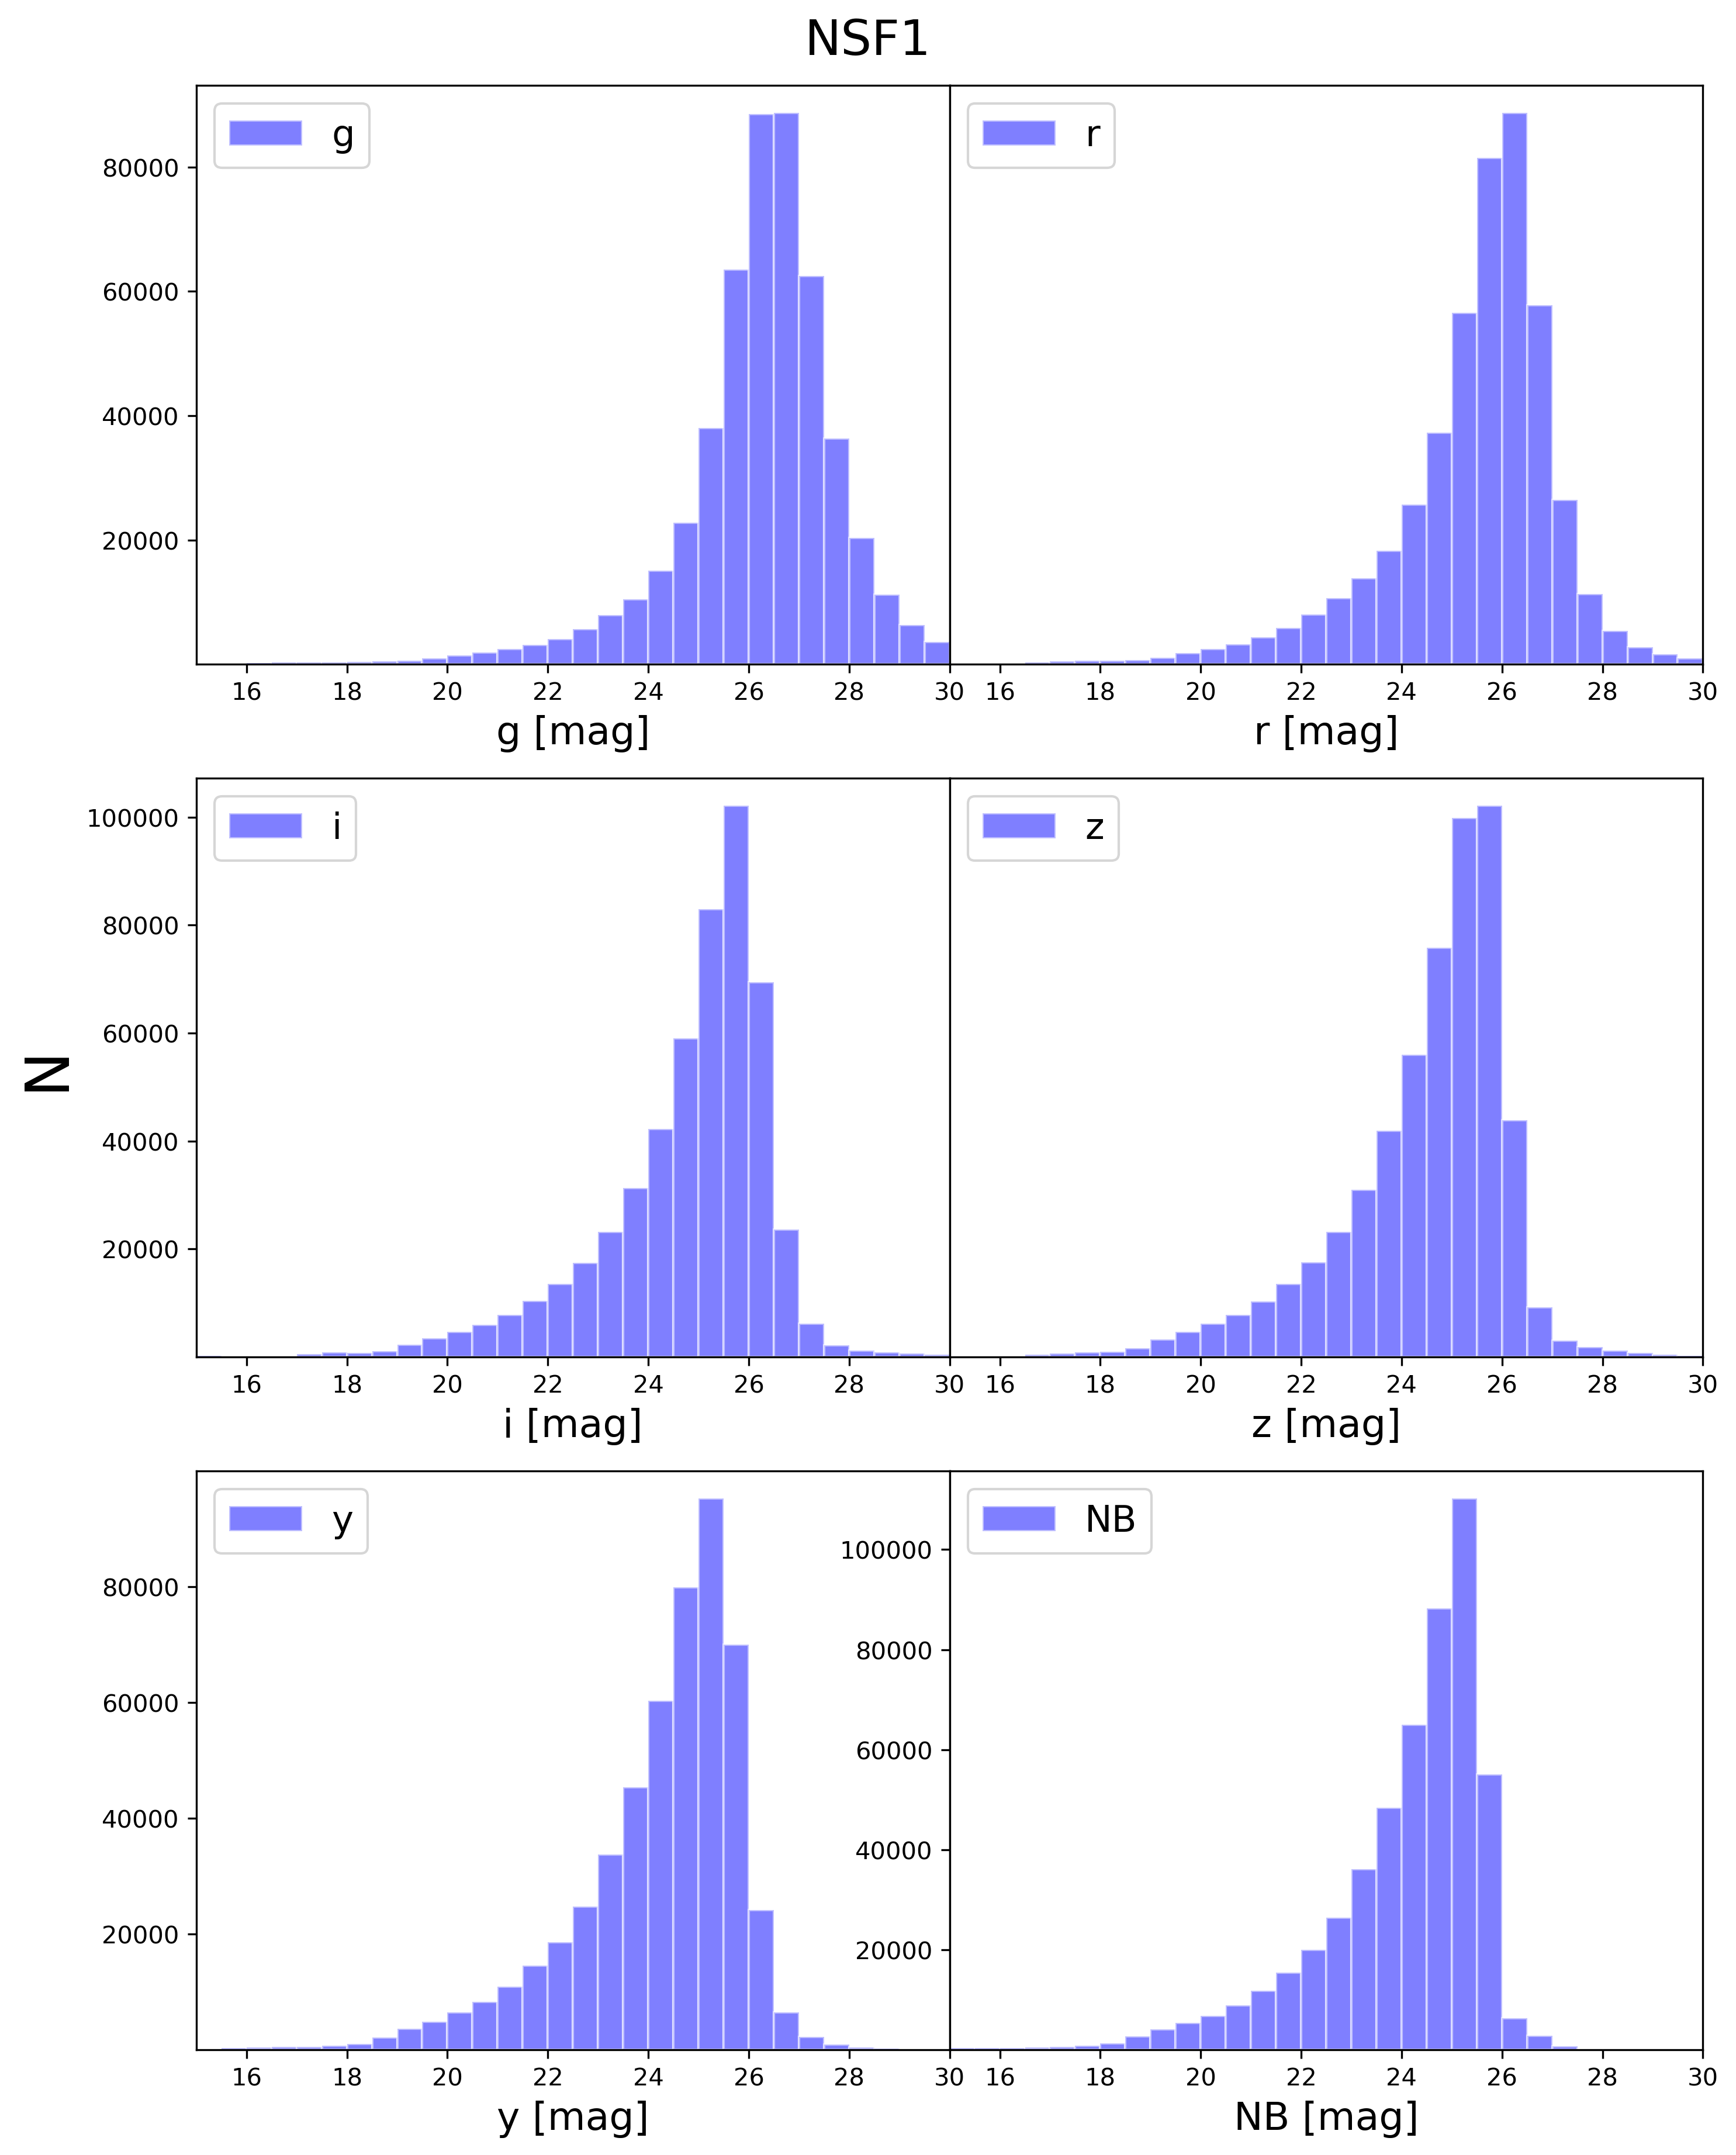

In [13]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(lista):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].hist(mag, range = (15, 30),label = nombres[i],
            bins = 30 , color = 'b', ec = 'white', alpha = 0.5, bottom = 0.5)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    ax[1][0].set_ylabel(r'N', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(15,30)
    
    if i in [1,3]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

In [14]:
t =table[0:10000]
t.write('cat_10000', format='fits')

OSError: File exists: cat_10000